In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [27]:
########
## Read dataset to pandas
########
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
#############
## Dividing dataset to inputs and outputs 
############
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Also dividing dataset into train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Normalization before prediction
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Training model 
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

# Making prediction for test dataset
y_pred = classifier.predict(X_test)

In [16]:
# Print result (precision = 97%)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Mean Error')

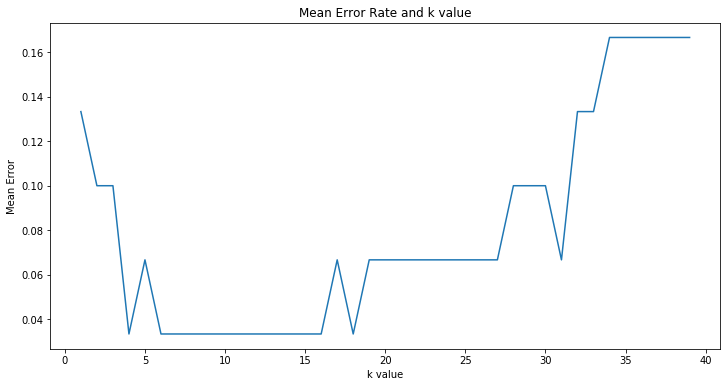

In [17]:
##################
## Caclcuting mean error for values of k from 1 to 40
##################
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error)
plt.title('Mean Error Rate and k value')
plt.xlabel('k value')
plt.ylabel('Mean Error')